<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/%5B20250512%5D%20Trust%20FL%20MLP-LSTM_logged_extended%20on%20WSN-BFSF(With%20AUC%26ROC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trust FL MLP-LSTM_logged_extended on WSN-BFSF

In [ ]:
# trust_federated_mlp_lstm_logged_extended.py

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, InputLayer
from keras.regularizers import l2
from keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from scipy.spatial.distance import cosine

In [ ]:
# Load dataset
dataset = pd.read_csv("dataset.csv")  # WSN-BFSF 4-class dataset
dataset = dataset.dropna()  # Remove missing values

In [ ]:
dataset

,Event,Time,S_Node,Node_id,Rest_Energy,Trace_Level,Mac_Type_Pckt,Source_IP_Port,Des_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num,Class
0,1,0.100000,79,79,600.000000,5,0,79.255,1.255,48,30,1,1,100,0,79,4,0
1,2,0.100963,78,78,599.979723,5,800,79.255,1.255,48,30,1,1,100,0,79,4,0
2,2,0.100963,76,76,599.979722,5,800,79.255,1.255,48,30,1,1,100,0,79,4,0
3,2,0.100964,75,75,599.979722,5,800,79.255,1.255,48,30,1,1,100,0,79,4,0
4,2,0.100964,118,118,599.979722,5,800,79.255,1.255,48,30,1,1,100,0,79,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312101,4,656.526536,140,140,465.332078,5,800,140.255,1.255,48,30,1,31,100,16,140,68,1
312102,4,657.209643,140,140,465.191806,5,800,140.255,1.255,48,30,1,33,100,16,140,72,1
312103,4,657.891729,140,140,465.051737,5,800,140.255,1.255,48,30,1,35,100,16,140,76,1
312104,4,658.574656,140,140,464.911501,5,800,140.255,1.255,48,30,1,37,100,16,140,80,1


In [ ]:
# Encode non-numeric columns (if any)
for column in dataset.columns:
    if dataset[column].dtype == 'object':  # Identify categorical columns
        dataset[column] = LabelEncoder().fit_transform(dataset[column])

# Separate features (X) and target (y)
X = dataset.drop(['Class'], axis=1)  # Assuming 'Class' is the target column
y = dataset['Class']

print("Original Class Distribution:", np.bincount(y))

Original Class Distribution: [262851  11766   7645  29844]


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler # Import StandardScaler here
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Verify the balanced dataset distribution
print("Balanced Class Distribution:", np.bincount(y))

Balanced Class Distribution: [262851 262851 262851 262851]


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [ ]:
pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, TimeDistributed
from tensorflow.keras.regularizers import l2
import numpy as np

from sklearn.metrics import roc_curve, auc
from itertools import cycle

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step
Round 1
Accuracy: 0.65966017, Precision: 0.66594042, Recall: 0.65966017, F1-Score: 0.65949517
Confusion Matrix:
[[33560 11684  6780   546]
 [ 8557 33261  4759  5993]
 [12987  5030 29239  5314]
 [    0  9894    23 42654]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step
Round 2
Accuracy: 0.87172878, Precision: 0.88060754, Recall: 0.87172878, F1-Score: 0.86772259
Confusion Matrix:
[[34598 12638  5334     0]
 [ 1544 47264   627  3135]
 [  184   302 49919  2165]
 [    0   484   560 51527]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step
Round 3
Accuracy: 0.89503569, Precision: 0.90628311, Recall: 0.89503569, F1-Score: 0.89254345
Confusion Matrix:
[[36846 11780  3944     0]
 [  299 49744   198  2329]
 [  151   112 51158  1149]
 [    0  1174   936 50461]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step
Round 4
Accuracy: 0.90471797, Precision: 0.91375815, Recall: 0.90471797, F1-Score: 0.90277908
Confusion Matrix:
[[38438 10636  3496     0]
 [  257 49673    70  2570]
 [   98   155 51343   974]
 [    0   783   997 50791]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step
Round 5
Accuracy: 0.91421479, Precision: 0.92173685, Recall: 0.91421479, F1-Score: 0.91252099
Confusion Matrix:
[[39570  9579  3420     1]
 [  146 49893    58  2473]
 [  103   195 51445   827]
 [    0   537   700 51334]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step
Round 6
Accuracy: 0.91714896, Precision: 0.92421671, Recall: 0.91714896, F1-Score: 0.91562992
Confusion Matrix:
[[40105  9343  3121     1]
 [  117 50048    51  2354]
 [   62    99 51337  1072]
 [    0   412   790 51369]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step
Round 7
Accuracy: 0.92120543, Precision: 0.92714641, Recall: 0.92120543, F1-Score: 0.91999988
Confusion Matrix:
[[41204  8491  2875     0]
 [  162 49674    42  2692]
 [   78    78 52367    47]
 [    0   330  1774 50467]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step
Round 8
Accuracy: 0.92826266, Precision: 0.93303138, Recall: 0.92826266, F1-Score: 0.92733208
Confusion Matrix:
[[42233  7594  2743     0]
 [  185 50010    33  2342]
 [   86    89 51613   782]
 [    0   546   685 51340]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step
Round 9
Accuracy: 0.93286127, Precision: 0.93716113, Recall: 0.93286127, F1-Score: 0.93210839
Confusion Matrix:
[[43030  6878  2659     3]
 [  288 50298    38  1946]
 [   93    77 52354    46]
 [    0   658  1432 50481]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step
Round 10
Accuracy: 0.92687880, Precision: 0.93141386, Recall: 0.92687880, F1-Score: 0.92612319
Confusion Matrix:
[[42846  6962  2762     0]
 [  301 49746    97  2426]
 [   91    75 52401     3]
 [    0   620  2039 49912]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step
Round 11
Accuracy: 0.92904732, Precision: 0.93284535, Recall: 0.92904732, F1-Score: 0.92841566
Confusion Matrix:
[[43494  6423  2653     0]
 [  292 49325    59  2894]
 [   69    73 52425     3]
 [    0   793  1661 50117]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step
Round 12
Accuracy: 0.93483482, Precision: 0.93940737, Recall: 0.93483482, F1-Score: 0.93437508
Confusion Matrix:
[[43863  5980  2727     0]
 [  343 50834    56  1337]
 [   65    60 52442     3]
 [    0  1539  1593 49439]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step
Round 13
Accuracy: 0.93716503, Precision: 0.94312913, Recall: 0.93716503, F1-Score: 0.93702620
Confusion Matrix:
[[44559  5732  2279     0]
 [  342 51822    47   359]
 [   88    65 52404    13]
 [    0  2737  1551 48283]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step
Round 14
Accuracy: 0.95115583, Precision: 0.95402242, Recall: 0.95115583, F1-Score: 0.95081017
Confusion Matrix:
[[45340  5080  2150     0]
 [  443 51542    38   547]
 [   89    65 52408     8]
 [    0   895   956 50720]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step
Round 15
Accuracy: 0.94061755, Precision: 0.94578459, Recall: 0.94061755, F1-Score: 0.94030426
Confusion Matrix:
[[44322  5750  2498     0]
 [  325 51834    46   365]
 [   77    76 52414     3]
 [    0  1911  1436 49224]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step
Round 16
Accuracy: 0.94561563, Precision: 0.95013509, Recall: 0.94561563, F1-Score: 0.94548951
Confusion Matrix:
[[45396  5118  2056     0]
 [  364 51926    41   239]
 [   75    62 52430     3]
 [    0  2171  1307 49093]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step
Round 17
Accuracy: 0.94932495, Precision: 0.95262322, Recall: 0.94932495, F1-Score: 0.94914736
Confusion Matrix:
[[45824  4803  1943     0]
 [  433 51685    31   421]
 [  110    62 52395     3]
 [    0  1475  1375 49721]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step
Round 18
Accuracy: 0.94581061, Precision: 0.95034243, Recall: 0.94581061, F1-Score: 0.94556780
Confusion Matrix:
[[44858  5629  2083     0]
 [  281 51941    32   316]
 [   87    70 52410     3]
 [    0  1682  1212 49677]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step
Round 19
Accuracy: 0.95159334, Precision: 0.95521416, Recall: 0.95159334, F1-Score: 0.95148735
Confusion Matrix:
[[45944  4896  1730     0]
 [  340 51989    28   213]
 [  104    68 52394     4]
 [    0  1721  1075 49775]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step
Round 20
Accuracy: 0.95320547, Precision: 0.95625116, Recall: 0.95320547, F1-Score: 0.95309507
Confusion Matrix:
[[46277  4559  1734     0]
 [  395 51770    35   370]
 [   65    60 52441     4]
 [    0  1592  1026 49953]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step
Round 21
Accuracy: 0.95334814, Precision: 0.95616758, Recall: 0.95334814, F1-Score: 0.95318773
Confusion Matrix:
[[46215  4472  1883     0]
 [  394 51719    32   425]
 [   94    67 52406     3]
 [    0  1377  1063 50131]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step
Round 22
Accuracy: 0.95520280, Precision: 0.95839945, Recall: 0.95520280, F1-Score: 0.95514504
Confusion Matrix:
[[46564  4520  1486     0]
 [  369 52109    26    66]
 [  103    70 52394     3]
 [    0  1605  1172 49794]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step
Round 23
Accuracy: 0.95623000, Precision: 0.95904849, Recall: 0.95623000, F1-Score: 0.95617476
Confusion Matrix:
[[46890  3990  1690     0]
 [  451 51988    29   102]
 [   66    76 52418    10]
 [    0  1727  1063 49781]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step
Round 24
Accuracy: 0.95649155, Precision: 0.95895488, Recall: 0.95649155, F1-Score: 0.95643347
Confusion Matrix:
[[46917  4225  1428     0]
 [  435 51696    27   412]
 [   87    67 52413     3]
 [    0  1456  1009 50106]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step
Round 25
Accuracy: 0.95984421, Precision: 0.96224468, Recall: 0.95984421, F1-Score: 0.95980758
Confusion Matrix:
[[47219  3841  1510     0]
 [  486 52016    27    41]
 [   94    56 52417     3]
 [    0  1602   784 50185]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step
Round 26
Accuracy: 0.95817501, Precision: 0.96043449, Recall: 0.95817501, F1-Score: 0.95801799
Confusion Matrix:
[[46787  4107  1675     1]
 [  415 51867    33   255]
 [   79    57 52431     3]
 [    0   894  1276 50401]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step
Round 27
Accuracy: 0.96042914, Precision: 0.96273816, Recall: 0.96042914, F1-Score: 0.96038399
Confusion Matrix:
[[47415  3705  1450     0]
 [  448 52050    29    43]
 [   70    57 52440     3]
 [    0  1438  1078 50055]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step
Round 28
Accuracy: 0.96135172, Precision: 0.96340122, Recall: 0.96135172, F1-Score: 0.96131562
Confusion Matrix:
[[47660  3425  1485     0]
 [  528 51975    20    47]
 [   85    60 52422     3]
 [    0  1479   995 50097]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step
Round 29
Accuracy: 0.95819404, Precision: 0.96092404, Recall: 0.95819404, F1-Score: 0.95821514
Confusion Matrix:
[[47422  3571  1577     0]
 [  468 52034    31    37]
 [   64    61 52435    10]
 [    0  2168   804 49599]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step
Round 30
Accuracy: 0.96097603, Precision: 0.96327586, Recall: 0.96097603, F1-Score: 0.96088007
Confusion Matrix:
[[47203  3855  1512     0]
 [  339 52152    27    52]
 [   84    54 52429     3]
 [    0  1108  1172 50291]]



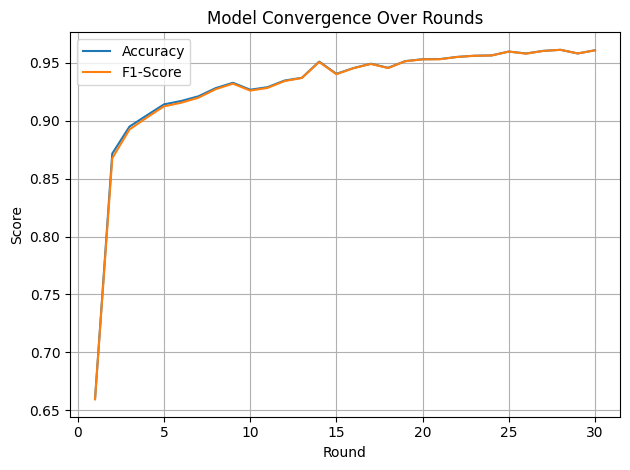

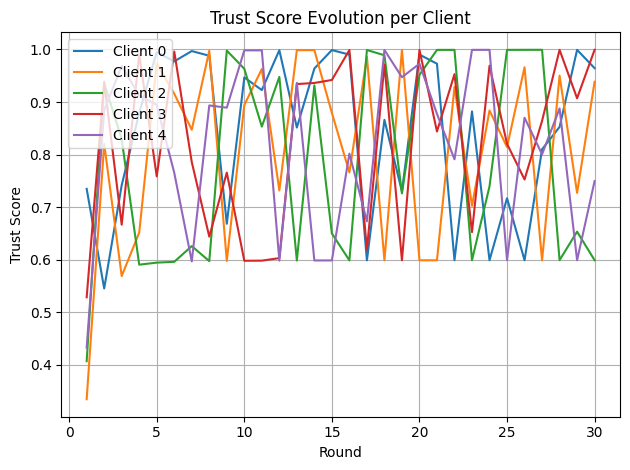

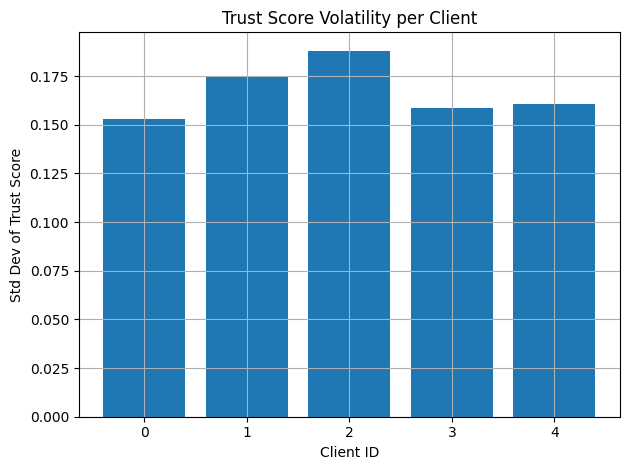

6572/6572 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step


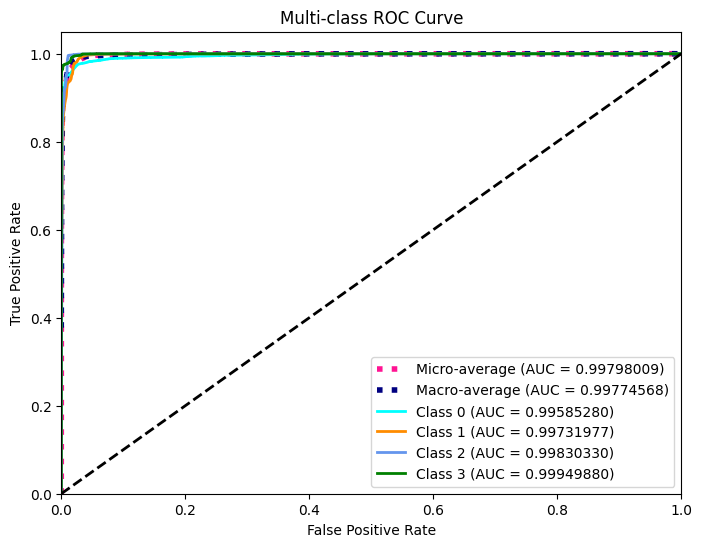


AUC Scores:
Class 0: 0.99585280
Class 1: 0.99731977
Class 2: 0.99830330
Class 3: 0.99949880
Micro-average: 0.99798009
Macro-average: 0.99774568


In [ ]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = y_train_cat.shape[1]

def build_hybrid_model(input_shape, num_classes):
    model = Sequential()
    model.add(InputLayer(input_shape=input_shape))
    model.add(LSTM(64, activation='tanh', return_sequences=False, kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def compute_cosine_similarity(update1, update2):
    flat1 = np.concatenate([w.flatten() for w in update1])
    flat2 = np.concatenate([w.flatten() for w in update2])
    return 1 - cosine(flat1, flat2)

def compute_stability(client_updates, history):
    if len(history) < 2:
        return 1.0
    sims = [compute_cosine_similarity(client_updates, past) for past in history[-3:]]
    return np.mean(sims)

def normalize(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val + 1e-8)

def compute_trust_scores(client_updates_dict, global_weights, val_losses_dict, update_history_dict, alpha=(0.4, 0.4, 0.2)):
    scores = {}
    all_val_losses = list(val_losses_dict.values())
    min_loss, max_loss = min(all_val_losses), max(all_val_losses)

    for client_id, local_update in client_updates_dict.items():
        sim = compute_cosine_similarity(local_update, global_weights)
        val_loss = val_losses_dict[client_id]
        stability = compute_stability(local_update, update_history_dict.get(client_id, []))
        norm_val_loss = normalize(val_loss, min_loss, max_loss)
        trust = (alpha[0] * sim) + (alpha[1] * (1 - norm_val_loss)) + (alpha[2] * stability)
        scores[client_id] = trust
    return scores

def trust_weighted_aggregation(client_weights, trust_scores):
    total_trust = sum(trust_scores.values())
    new_global = [
        sum(trust_scores[cid] * np.array(client_weights[cid][i]) for cid in client_weights) / total_trust
        for i in range(len(next(iter(client_weights.values()))))
    ]
    return new_global

def evaluate_global_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    cm = confusion_matrix(y_true_classes, y_pred_classes)

    return accuracy, precision, recall, f1, cm

# Trust and metric logs
trust_log = []
round_metrics = []
communication_cost_log = []

def federated_learning_with_trust(X_train, y_train_cat, X_test, y_test_cat, num_clients=5, rounds=30):
    client_data = np.array_split(X_train, num_clients)
    client_labels = np.array_split(y_train_cat, num_clients)

    global_model = build_hybrid_model(input_shape, num_classes)
    global_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    global_weights = global_model.get_weights()

    update_history = {i: [] for i in range(num_clients)}

    for round in range(rounds):
        client_updates = {}
        val_losses = {}
        round_cost = 0

        for i in range(num_clients):
            local_model = build_hybrid_model(input_shape, num_classes)
            local_model.set_weights(global_weights)
            local_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
            local_model.fit(client_data[i], client_labels[i], epochs=1, batch_size=32, verbose=0)

            local_weights = local_model.get_weights()
            loss, _ = local_model.evaluate(X_test, y_test_cat, verbose=0)

            client_updates[i] = local_weights
            val_losses[i] = loss
            update_history[i].append(local_weights)

            # Compute communication cost per client
            round_cost += sum(w.nbytes for w in local_weights)

        trust_scores = compute_trust_scores(client_updates, global_weights, val_losses, update_history)

        for client_id, score in trust_scores.items():
            trust_log.append({
                'round': round + 1,
                'client_id': client_id,
                'trust_score': score
            })

        global_weights = trust_weighted_aggregation(client_updates, trust_scores)
        global_model.set_weights(global_weights)

        accuracy, precision, recall, f1, cm = evaluate_global_model(global_model, X_test, y_test_cat)
        print(f"Round {round + 1}")
        #print(f"Accuracy: {accuracy:.8f}, F1-Score: {f1:.8f}")
        print(f"Accuracy: {accuracy:.8f}, Precision: {precision:.8f}, Recall: {recall:.8f}, F1-Score: {f1:.8f}")
        print(f"Confusion Matrix:\n{cm}\n")

        round_metrics.append({'round': round + 1, 'accuracy': accuracy, 'f1': f1})
        communication_cost_log.append({'round': round + 1, 'comm_cost_MB': round_cost / (1024**2)})

    # Save logs
    pd.DataFrame(trust_log).to_csv("trust_scores_log.csv", index=False)
    pd.DataFrame(round_metrics).to_csv("round_metrics_log.csv", index=False)
    pd.DataFrame(communication_cost_log).to_csv("communication_cost_log.csv", index=False)

    # Plot accuracy and F1-score
    metric_df = pd.DataFrame(round_metrics)
    plt.plot(metric_df['round'], metric_df['accuracy'], label='Accuracy')
    plt.plot(metric_df['round'], metric_df['f1'], label='F1-Score')
    plt.title("Model Convergence Over Rounds")
    plt.xlabel("Round")
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot trust score trends
    trust_df = pd.DataFrame(trust_log)
    for client_id in trust_df['client_id'].unique():
        client_data = trust_df[trust_df['client_id'] == client_id]
        plt.plot(client_data['round'], client_data['trust_score'], label=f'Client {client_id}')
    plt.xlabel("Round")
    plt.ylabel("Trust Score")
    plt.title("Trust Score Evolution per Client")
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot trust score volatility (standard deviation over rounds)
    volatility = trust_df.groupby('client_id')['trust_score'].std().reset_index()
    plt.bar(volatility['client_id'], volatility['trust_score'])
    plt.title("Trust Score Volatility per Client")
    plt.xlabel("Client ID")
    plt.ylabel("Std Dev of Trust Score")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Add ROC/AUC calculation and plotting
    y_pred = global_model.predict(X_test)
    y_test_labels = np.argmax(y_test_cat, axis=1)
    n_classes = y_test_cat.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_cat.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(8, 6))
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'Micro-average (AUC = {roc_auc["micro"]:.8f})',
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label=f'Macro-average (AUC = {roc_auc["macro"]:.8f})',
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:.8f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Print AUC values
    print("\nAUC Scores:")
    for i in range(n_classes):
        print(f"Class {i}: {roc_auc[i]:.8f}")
    print(f"Micro-average: {roc_auc['micro']:.8f}")
    print(f"Macro-average: {roc_auc['macro']:.8f}")



# Execute
federated_learning_with_trust(X_train, y_train_cat, X_test, y_test_cat)